In [307]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
from math import exp
from math import ceil
from math import sqrt
#from jupyterthemes import jtplot
#jtplot.style()

In [3]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data['target'] = pd.DataFrame(iris.target)
data = iris_data[iris_data['target'] != 2]
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


$$H(\theta) = \theta_1X_1 + \theta_2X_2 + \theta_3X_3 + \theta_4X_4 + \theta_0$$

$$J = \sum_{i=1}^{N} y_i\log (h_\theta(x_i)) + (1 - y_i)\log(1 - h_\theta(x_i))$$

In [273]:
def grad(X, Y, theta):
    
    grad = 0
    
    for i in range(len(Y)):
        grad += (Y[i]-sum(X.transpose()[i]*theta))*X.transpose()[i]

    return np.array(grad / len(Y))
        

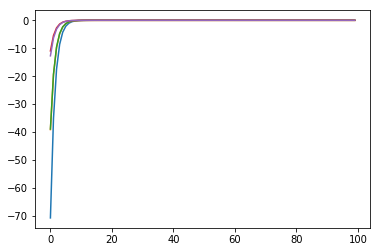

In [296]:
X1 = data['sepal length (cm)']
X2 = data['sepal width (cm)']
X3 = data['petal length (cm)']
X4 = data['petal width (cm)']
Y = data['target']
X = np.array([X1, X2, X3, X4, [1]*len(X1)])
#X = np.array([X1, X2, X3, X4])
theta1 = 1
theta2 = 1
theta3 = 1
theta4 = 1
theta0 = 1.
theta = np.array([theta1, theta2, theta3, theta4, theta0])

gamma = 0.01
grad_data = []
theta_data = []

for _ in range(100):
    grad_data.append(grad(X, Y, theta))
    theta_data.append(theta)
    theta +=  gamma * grad_data[-1]
    
plt.plot(grad_data)
plt.show()

In [297]:
Y_head = []
for i in range(len(Y)):
    if sum(X.transpose()[i]*theta) > 0:
        Y_head.append(1)
    else:
        Y_head.append(0)
accuracy_score(Y,Y_head)

0.73

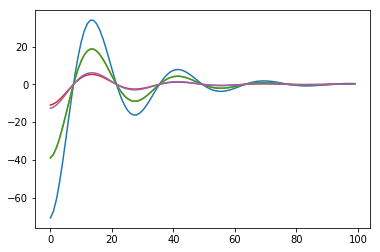

In [304]:
X1 = data['sepal length (cm)']
X2 = data['sepal width (cm)']
X3 = data['petal length (cm)']
X4 = data['petal width (cm)']
Y = data['target']
X = np.array([X1, X2, X3, X4, [1]*len(X1)])
#X = np.array([X1, X2, X3, X4])
theta1 = 1
theta2 = 1
theta3 = 1
theta4 = 1
theta0 = 1.
theta = np.array([theta1, theta2, theta3, theta4, theta0])

gamma = 0.001
grad_data = []
theta_data = []
V = np.array([0,0,0,0,0])

for _ in range(100):
    grad_data.append(grad(X, Y, theta))
    theta_data.append(theta)
    V = 0.9 * V + gamma * grad_data[-1]
    theta +=  V

plt.plot(grad_data)
plt.show()

In [305]:
Y_head = []
for i in range(len(Y)):
    if sum(X.transpose()[i]*theta) > 0:
        Y_head.append(1)
    else:
        Y_head.append(0)
accuracy_score(Y,Y_head)

0.82

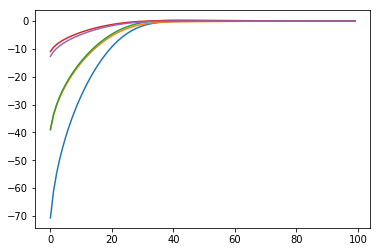

In [324]:
X1 = data['sepal length (cm)']
X2 = data['sepal width (cm)']
X3 = data['petal length (cm)']
X4 = data['petal width (cm)']
Y = data['target']
X = np.array([X1, X2, X3, X4, [1]*len(X1)])
#X = np.array([X1, X2, X3, X4])
theta1 = 1
theta2 = 1
theta3 = 1
theta4 = 1
theta0 = 1.
theta = np.array([theta1, theta2, theta3, theta4, theta0])

gamma = 0.1
grad_data = []
theta_data = []
G = np.array([0,0,0,0,0])

for _ in range(100):
    grad_data.append(grad(X, Y, theta))
    theta_data.append(theta)
    G = 0.9 * G + (1 - 0.4) * grad_data[-1] ** 2
    G2 = []
    for g in G:
        G2.append(sqrt(g))
    G2 = np.array(G2)
    theta +=  gamma / G2 * grad_data[-1]

plt.plot(grad_data)
plt.show()

In [325]:
Y_head = []
for i in range(len(Y)):
    if sum(X.transpose()[i]*theta) > 0:
        Y_head.append(1)
    else:
        Y_head.append(0)
accuracy_score(Y,Y_head)

0.69